### Assignment 22 - ML Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
import xgboost as xgb
from sklearn.metrics import classification_report

##### Load the dataset

In [3]:
train = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header = None)
test = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [4]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

In [5]:
train.columns = col_labels
test.columns = col_labels

##### About the dataset

In [6]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [8]:
print(train.shape)
print(test.shape)

(32561, 15)
(16281, 15)


In [9]:
train['set'] = 'train'
test['set'] = 'test'

In [10]:
data = pd.concat([train,test], ignore_index = True)

In [11]:
data.shape

(48842, 16)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
 15  set             48842 non-null  object
dtypes: int64(6), object(10)
memory usage: 6.0+ MB


In [13]:
num_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
cat_cols = ['workclass', 'education', 'marital_status', 'occupation','relationship', 'race', 'sex', 'native_country', 'wage_class']

In [14]:
data[num_cols].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
for i in cat_cols:
    print(pd.crosstab(index = data[i], columns='count'),'\n')

col_0              count
workclass               
 ?                  2799
 Federal-gov        1432
 Local-gov          3136
 Never-worked         10
 Private           33906
 Self-emp-inc       1695
 Self-emp-not-inc   3862
 State-gov          1981
 Without-pay          21 

col_0          count
education           
 10th           1389
 11th           1812
 12th            657
 1st-4th         247
 5th-6th         509
 7th-8th         955
 9th             756
 Assoc-acdm     1601
 Assoc-voc      2061
 Bachelors      8025
 Doctorate       594
 HS-grad       15784
 Masters        2657
 Preschool        83
 Prof-school     834
 Some-college  10878 

col_0                   count
marital_status               
 Divorced                6633
 Married-AF-spouse         37
 Married-civ-spouse     22379
 Married-spouse-absent    628
 Never-married          16117
 Separated               1530
 Widowed                 1518 

col_0               count
occupation               
 ?                 

##### Checking for Missing data

In [16]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
set               0
dtype: int64

In [17]:
# Replace ? with NaN value

data=data.replace(' ?',np.nan)

In [18]:
data.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
wage_class           0
set                  0
dtype: int64

In [19]:
wc_idx = data.index[data['workclass'].isnull()]
occ_idx = data.index[data['occupation'].isnull()]
nc_idx = data.index[data['native_country'].isnull()]

In [20]:
occ_idx.difference(wc_idx)

Int64Index([5361, 10845, 14772, 20337, 23232, 32304, 32314, 41346, 44168,
            46459],
           dtype='int64')

In [21]:
data.dropna(inplace=True)
data.shape

(45222, 16)

In [22]:
data['wage_class'] = data['wage_class'].replace('<=50K',0)
data['wage_class'] = data['wage_class'].replace('<=50K.',0)
data['wage_class'] = data['wage_class'].replace(' <=50K',0)
data['wage_class'] = data['wage_class'].replace(' <=50K.',0)
data['wage_class'] = data['wage_class'].replace('>50K',1)
data['wage_class'] = data['wage_class'].replace('>50K.',1)
data['wage_class'] = data['wage_class'].replace(' >50K',1)
data['wage_class'] = data['wage_class'].replace(' >50K.',1)

In [23]:
data['wage_class'] = data['wage_class'].astype('int')

##### Encoding categorical features

In [24]:
cat_cols.remove('wage_class')
data_dummies = pd.get_dummies(data, columns=cat_cols,drop_first=True)
data = data_dummies

In [25]:
data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,set,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,train,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,train,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,train,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,train,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,train,0,1,...,0,0,0,0,0,0,0,0,0,0


##### Spliting train and test dataset

In [26]:
train_data = data[data['set'] == 'train']
test_data = data[data['set'] == 'test']

In [27]:
train_data.drop(['set'],axis=1,inplace=True)
test_data.drop(['set'],axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
train_data.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X_train = train_data.loc[:, train_data.columns != 'wage_class']
y_train = train_data.loc[:,'wage_class']
X_test = test_data.iloc[:, test_data.columns != 'wage_class']
y_test = test_data.loc[:,'wage_class']

#### Model Building: 

##### XGBoost Classifier

In [30]:
xgbc = xgb.XGBClassifier(objective='binary:logistic',random_state=0)

In [31]:
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# Predicting for test dataset

xgbc_y = xgbc.predict(X_test)

In [40]:
# Performance of the model

target_names=['<=50K','>50k']
print(classification_report(y_test,xgbc_y,target_names=target_names))
print('Score of XGBoost Classifier = ', xgbc.score(X_test,y_test))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91     11360
        >50k       0.77      0.66      0.71      3700

    accuracy                           0.87     15060
   macro avg       0.83      0.80      0.81     15060
weighted avg       0.86      0.87      0.86     15060

Score of XGBoost Classifier =  0.8673970783532536


##### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
# Predicting for test dataset

lr_y = lr.predict(X_test)

In [41]:
# Performance of the model

target_names=['<=50K','>50k']
print(classification_report(y_test,lr_y,target_names=target_names))
print('Score of Logistic Regression = ',lr.score(X_test,y_test))

              precision    recall  f1-score   support

       <=50K       0.80      0.96      0.88     11360
        >50k       0.71      0.27      0.39      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.62      0.63     15060
weighted avg       0.78      0.79      0.76     15060

Score of Logistic Regression =  0.7926958831341302


##### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(n_estimators=150,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
# Predicting for test dataset

rf_y = rf.predict(X_test)

In [45]:
# Performance of the model

target_names=['<=50K','>50k']
print(classification_report(y_test,rf_y,target_names=target_names))
print('Score of Random Forest = ',rf.score(X_test,y_test))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90     11360
        >50k       0.72      0.62      0.66      3700

    accuracy                           0.85     15060
   macro avg       0.80      0.77      0.78     15060
weighted avg       0.84      0.85      0.84     15060

Score of Logistic Regression =  0.8468127490039841


##### Comparison of Models

In [49]:
print('Score:\n')
print('XGBoost = ', xgbc.score(X_test,y_test))
print('Logistic Regression = ',lr.score(X_test,y_test))
print('Random Forest = ',rf.score(X_test,y_test))

Score:

XGBoost =  0.8673970783532536
Logistic Regression =  0.7926958831341302
Random Forest =  0.8468127490039841


##### Best Model is XGBoost

##### Important Features

Text(0.5, 0, 'Xgboost Feature Importance')

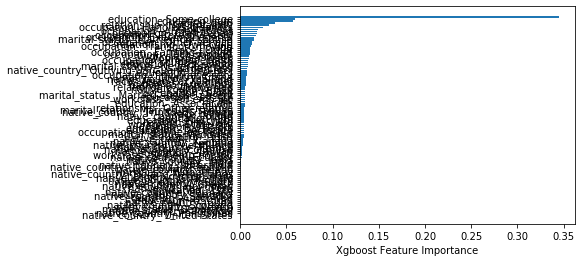

In [53]:
sorted_idx = xgbc.feature_importances_.argsort()
plt.barh(data.columns[sorted_idx], xgbc.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

In [57]:
data.columns[sorted_idx[0:10]]

Index(['native_country_ United-States', 'native_country_ Philippines',
       'native_country_ Portugal', 'marital_status_ Separated',
       'native_country_ Mexico', 'native_country_ Scotland',
       'native_country_ Cuba', 'education_ HS-grad', 'education_ Assoc-voc',
       'native_country_ El-Salvador'],
      dtype='object')